# Task 1 -  Exploratory Sales Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", context="talk")

In [3]:
df = pd.read_csv("holidays_events.csv")
print("Loaded rows, cols:", df.shape)
print(df.head())

Loaded rows, cols: (350, 6)
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


In [4]:
print("\nColumn types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())


Column types:
 date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

Missing values per column:
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.dropna(subset=['date']).reset_index(drop=True)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()

print("\nYears present:", sorted(df['year'].unique()))
print("Range:", df['date'].min(), "to", df['date'].max())


Years present: [np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017)]
Range: 2012-03-02 00:00:00 to 2017-12-26 00:00:00


In [6]:
cat_columns = ['type', 'locale', 'locale_name', 'description', 'transferred']
for c in cat_columns:
    print(f"\nTop counts for '{c}':")
    print(df[c].value_counts().head(10))
    print(f"Mode of {c}:", df[c].mode().iloc[0])


Top counts for 'type':
type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64
Mode of type: Holiday

Top counts for 'locale':
locale
National    174
Local       152
Regional     24
Name: count, dtype: int64
Mode of locale: National

Top counts for 'locale_name':
locale_name
Ecuador      174
Quito         13
Guaranda      12
Riobamba      12
Latacunga     12
Ambato        12
Guayaquil     11
Cuenca         7
Ibarra         7
Imbabura       6
Name: count, dtype: int64
Mode of locale_name: Ecuador

Top counts for 'description':
description
Carnaval                         10
Fundacion de Ibarra               7
Fundacion de Cuenca               7
Cantonizacion de Libertad         6
Cantonizacion de Riobamba         6
Cantonizacion del Puyo            6
Fundacion de Manta                6
Cantonizacion de Guaranda         6
Provincializacion de Imbabura     6
Fundacion de Machala              6
Name: count,

In [7]:
num_cols = ['year', 'month', 'day']
print("\nNumeric/time columns describe():\n", df[num_cols].describe())

print("\nMissing values:\n", df.isnull().sum())


Numeric/time columns describe():
               year       month         day
count   350.000000  350.000000  350.000000
mean   2014.714286    7.711429   14.688571
std       1.614253    3.333366    9.154994
min    2012.000000    1.000000    1.000000
25%    2013.000000    5.000000    7.000000
50%    2015.000000    7.000000   12.000000
75%    2016.000000   11.000000   24.000000
max    2017.000000   12.000000   31.000000

Missing values:
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
year           0
month          0
day            0
weekday        0
month_name     0
dtype: int64


In [8]:
# Events per year
events_per_year = df.groupby('year').size().rename('count').reset_index()
print("\nEvents per year:\n", events_per_year)


Events per year:
    year  count
0  2012     41
1  2013     51
2  2014     67
3  2015     52
4  2016     86
5  2017     53


In [9]:
# Events per type
events_by_type = df['type'].value_counts().rename_axis('type').reset_index(name='count')
print("\nEvents by type:\n", events_by_type)


Events by type:
          type  count
0     Holiday    221
1       Event     56
2  Additional     51
3    Transfer     12
4      Bridge      5
5    Work Day      5


In [10]:
# top locales
top_locales = df['locale_name'].value_counts().rename_axis('locale_name').reset_index(name='count').head(15)
print("\nTop locales:\n", top_locales)


Top locales:
    locale_name  count
0      Ecuador    174
1        Quito     13
2     Guaranda     12
3     Riobamba     12
4    Latacunga     12
5       Ambato     12
6    Guayaquil     11
7       Cuenca      7
8       Ibarra      7
9     Imbabura      6
10    Cotopaxi      6
11    Libertad      6
12       Manta      6
13        Puyo      6
14   El Carmen      6


In [11]:
events_by_month = df.groupby('month').size().rename('count').reset_index()
events_by_month['month_name'] = events_by_month['month'].apply(lambda m: pd.Timestamp(2020, m, 1).month_name())
events_by_month = events_by_month.sort_values('month')
print("\nEvents by month:\n", events_by_month)


Events by month:
     month  count month_name
0       1     10    January
1       2      8   February
2       3      9      March
3       4     44      April
4       5     44        May
5       6     31       June
6       7     36       July
7       8     26     August
8       9      7  September
9      10     15    October
10     11     49   November
11     12     71   December


In [12]:
events_by_weekday = df['weekday'].value_counts().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
]).reset_index()
events_by_weekday.columns = ['weekday','count']
print("\nEvents by weekday (Mon-Sun order):\n", events_by_weekday)


Events by weekday (Mon-Sun order):
      weekday  count
0     Monday     57
1    Tuesday     46
2  Wednesday     39
3   Thursday     43
4     Friday     61
5   Saturday     53
6     Sunday     51


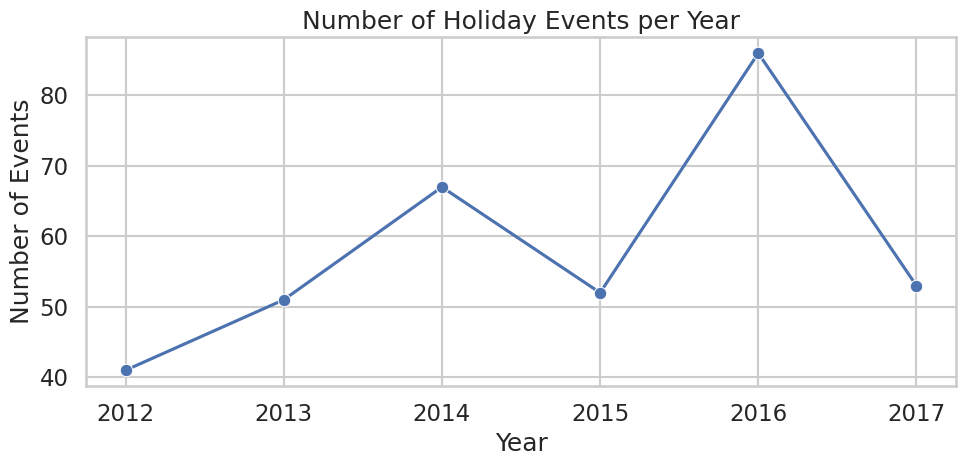

In [13]:
# Line plot: Events per year
plt.figure(figsize=(10,5))
sns.lineplot(data=events_per_year, x='year', y='count', marker='o')
plt.title('Number of Holiday Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

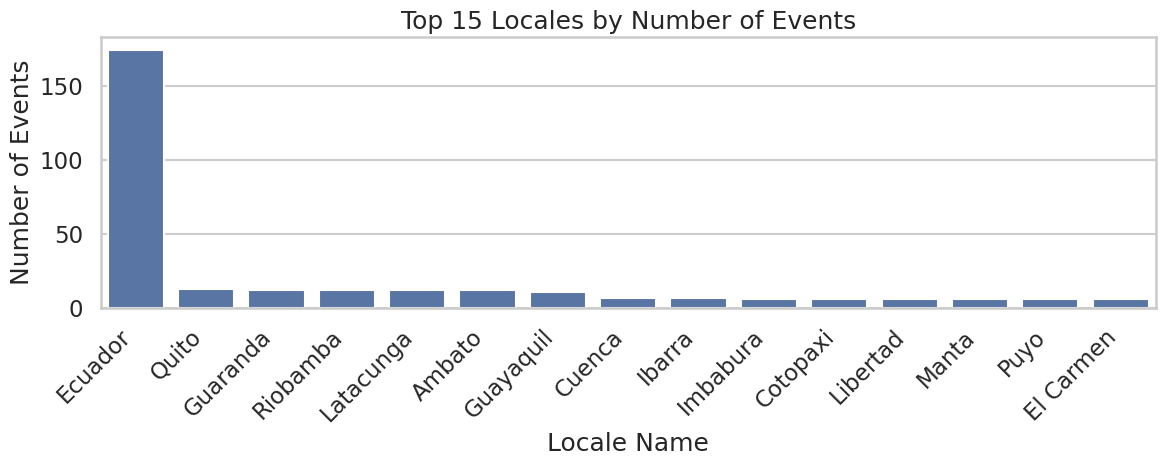

In [14]:
# Bar plot: Top locales
plt.figure(figsize=(12,5))
sns.barplot(data=top_locales, x='locale_name', y='count')
plt.title('Top 15 Locales by Number of Events')
plt.xlabel('Locale Name')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

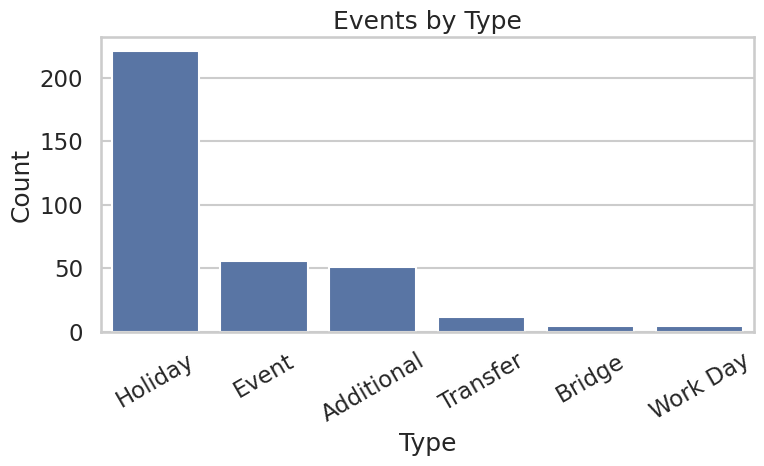

In [15]:
# Bar plot: Events by type
plt.figure(figsize=(8,5))
sns.barplot(data=events_by_type, x='type', y='count')
plt.title('Events by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

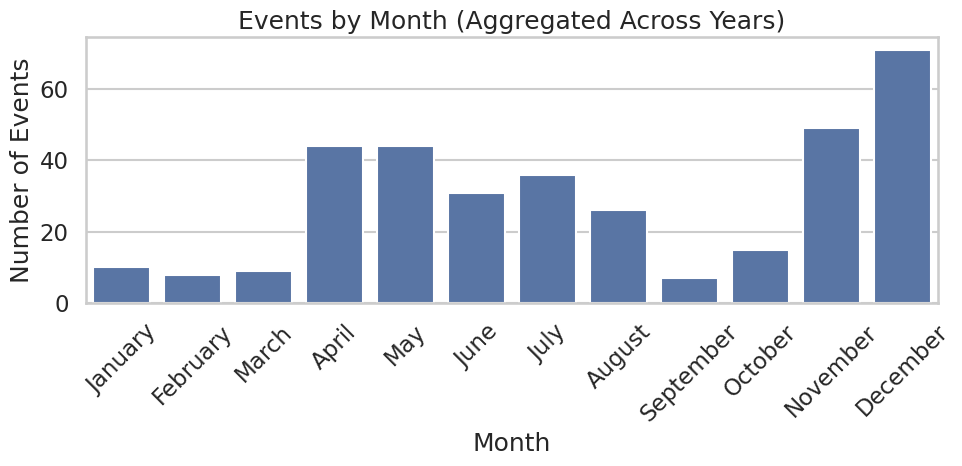

In [16]:
# Month-seasonality: line or bar
plt.figure(figsize=(10,5))
sns.barplot(data=events_by_month, x='month_name', y='count', order=events_by_month['month_name'])
plt.title('Events by Month (Aggregated Across Years)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

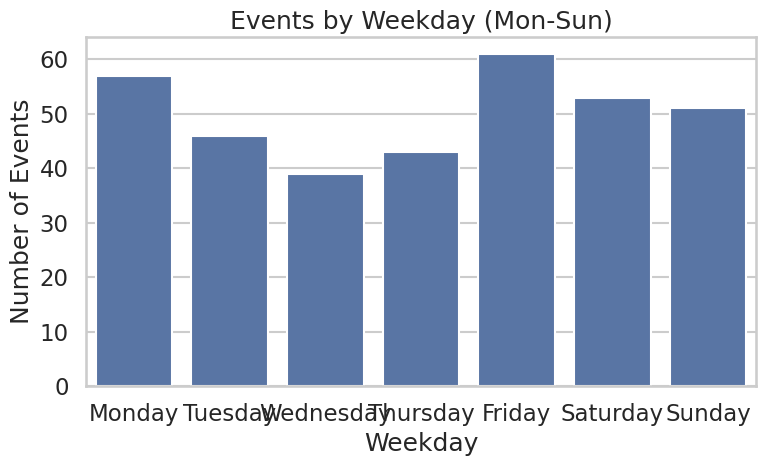

In [17]:
# Histogram
plt.figure(figsize=(8,5))
sns.barplot(data=events_by_weekday, x='weekday', y='count')
plt.title('Events by Weekday (Mon-Sun)')
plt.xlabel('Weekday')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

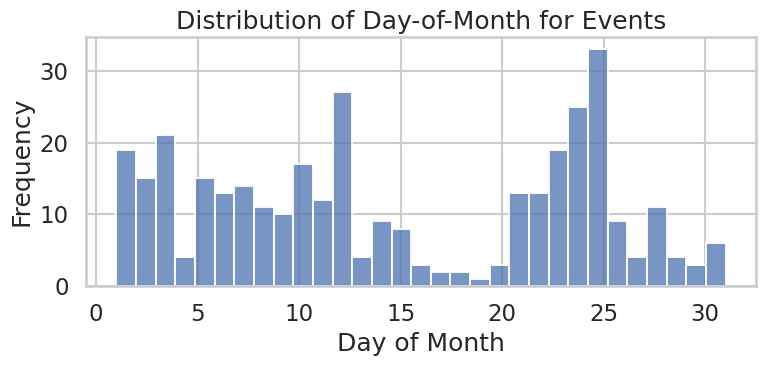

In [18]:
# Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['day'].dropna(), bins=31)
plt.title('Distribution of Day-of-Month for Events')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()